# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore Dataset

In [3]:
d=pd.read_csv('flight_data.csv')
d.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [5]:
d.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [6]:
d.describe(include='O')

,carrier,tailnum,origin,dest,time_hour
count,336776,334264,336776,336776,336776
unique,16,4043,3,105,6936
top,UA,N725MQ,EWR,ORD,13-09-2013 08:00
freq,58665,575,120835,17283,94


In [7]:
d.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [8]:
d.shape

(336776, 19)

# Data Cleaning & Preprocessing
- Handle missing values
- check data types
- convert time columns to datetime
- create new cols like month,dayofweek for the analysis over momths,days 

In [9]:
d.dropna(subset=['dep_time','arr_time','air_time'],inplace=True)#Because filling with 0 would imply the flight actually happened with zero delay and zero flight time, which is false information
d.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [10]:
d.shape

(327346, 19)

In [11]:
d.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

## changing the datatype of time hour

In [12]:
d['time_hour']=pd.to_datetime(d['time_hour'],format='mixed',dayfirst=True,errors='coerce')# dayfirst=True,Since our dates clearly have day first (13-01-2013 = 13th Jan 2013)
d.dtypes

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour         datetime64[ns]
dtype: object

##  Create new columns (Month, DayOfWeek, Route, etc.) to Nlyse trends over months ,days

In [13]:

d['Month']=d['time_hour'].dt.month
d['DayOfWeek']=d['time_hour'].dt.dayofweek
d

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Month,DayOfWeek
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,1,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,9,0
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,9,0
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,9,0
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,9,0


# Exploratory Data Analysis(EDA)

##  1.Basic Statistics
- average delays
- number of flights per airline('carrier in this dataset)
- most frequent routes

In [14]:
d.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'Month', 'DayOfWeek'],
      dtype='object')

In [15]:
#average delays
d[['dep_delay','arr_delay']].describe()

,dep_delay,arr_delay
count,327346.000000,327346.000000
mean,12.555156,6.895377
std,40.065688,44.633292
min,-43.000000,-86.000000
25%,-5.000000,-17.000000
50%,-2.000000,-5.000000
75%,11.000000,14.000000
max,1301.000000,1272.000000


In [16]:
# no of flights per airline
d['carrier'].value_counts()

carrier
UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: count, dtype: int64

In [17]:
d['route']=d['origin']+'-'+d['dest']
d[['origin','dest','route']].head(3)

,origin,dest,route
0,EWR,IAH,EWR-IAH
1,LGA,IAH,LGA-IAH
2,JFK,MIA,JFK-MIA


In [18]:
# most frequent routes
d['route'].value_counts().head()

route
JFK-LAX    11159
LGA-ATL    10041
LGA-ORD     8507
JFK-SFO     8109
LGA-CLT     5961
Name: count, dtype: int64

# Non -Visual bivariate analysis


In [140]:
d.dtypes

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour         datetime64[ns]
Month                      int32
DayOfWeek                  int32
route                     object
dtype: object

In [141]:
d.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,Month,DayOfWeek,route
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1,EWR-IAH
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1,LGA-IAH
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1,JFK-MIA


#  which moth has the highest number of flights

In [142]:
d['month'].value_counts().sort_values(ascending=False)


month
8     28756
10    28618
7     28293
5     28128
3     27902
4     27564
6     27075
12    27020
9     27010
11    26971
1     26398
2     23611
Name: count, dtype: int64

##  Insight
- July or August usually have the highest traffic due to summer travel.

# .what is the average arrival delay across all flights

In [143]:
d['arr_delay'].mean()

np.float64(6.89537675731489)

###   Insight
- on average flights are ariving 5 mins earlier than scheduled time

In [144]:
#arrival delay values can be positive (late arrivals), zero (on-time arrival), or negative (early arrivals).

# .which airline(carrier) has the highest arrrival delay 

In [145]:
d['arr_delay'] = pd.to_numeric(d['arr_delay'], errors='coerce')


In [146]:
d.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False)

carrier
F9    21.920705
FL    20.115906
EV    15.796431
YV    15.556985
OO    11.931034
MQ    10.774733
WN     9.649120
B6     9.457973
9E     7.379669
UA     3.558011
US     2.129595
VX     1.764464
DL     1.644341
AA     0.364291
HA    -6.915205
AS    -9.930889
Name: arr_delay, dtype: float64

##  Insight
- F9 has the highest arrival delay

# . Do morning flights depart on time more often than evening flights?


In [147]:
d['time_of_day']=np.where(d['hour']>12,'evening','morning')
d.groupby('time_of_day')['dep_delay'].mean()

time_of_day
evening    19.091522
morning     4.469412
Name: dep_delay, dtype: float64

##  Insight
- Morning flights usually have less delay because the system resets overnight.

# . which origin airport experiences the longest aversge departure delays

In [148]:
d.groupby('origin')['dep_delay'].mean().sort_values(ascending=False)

origin
EWR    15.009110
JFK    12.023607
LGA    10.286583
Name: dep_delay, dtype: float64

##  Insight
- EWR (Newark) usually has the worst delays.JFK moderate, LGA slightly better.

# .Is there any relation between the air_time and distance

In [149]:
d['air_time'].corr(d['distance'])

np.float64(0.9906496472248588)

##  Insight
- Correlation ≈ 0.95+ → strong positive relationship
- longer flights takes more time

# .On which day of the week the flights gets delayed the most

In [150]:
d.groupby(d['DayOfWeek'])['arr_delay'].mean().sort_values(ascending=False)

DayOfWeek
3    11.740819
0     9.653739
4     9.070120
2     7.051119
1     5.388526
6     4.820024
5    -1.448828
Name: arr_delay, dtype: float64

##  Insight
- Wednesday has the highest average arrival delay.

# which airline is most affected by late departures

In [151]:
(d['dep_delay']>15).groupby(d['carrier']).mean().sort_values(ascending=False)

carrier
EV    0.303514
YV    0.284926
F9    0.280470
WN    0.268682
FL    0.266142
9E    0.254886
B6    0.227682
MQ    0.210449
UA    0.209564
OO    0.206897
VX    0.173769
DL    0.162764
AA    0.158919
AS    0.132581
US    0.121527
HA    0.070175
Name: dep_delay, dtype: float64

##  Insight
- EV airline is most affected by the late departures

# which month has the highest average airtime(longest flights)

In [152]:
d.groupby('month')['air_time'].mean().sort_values(ascending=False)

month
12    162.591414
11    155.468614
1     154.187401
4     153.101146
2     151.346364
6     150.325245
3     149.076984
10    148.886086
8     148.160419
7     146.728272
5     145.727496
9     143.471196
Name: air_time, dtype: float64

##  Insight
nov and dec has highst average airtime

# which airline operates the longest average flight distance

In [153]:
d.groupby('carrier')['distance'].mean().sort_values(ascending=False)

carrier
HA    4983.000000
VX    2499.432565
AS    2402.000000
F9    1620.000000
UA    1531.321363
AA    1343.279870
DL    1237.979143
B6    1069.689615
WN     996.971355
FL     664.787402
MQ     570.374566
EV     562.865031
US     560.825929
9E     529.889615
OO     509.275862
YV     376.437500
Name: distance, dtype: float64

# which day of week has the most on time flights(arrival delay<=0)

In [155]:
(d['arr_delay']<=0).groupby(d['DayOfWeek']).mean().sort_values(ascending=False)

DayOfWeek
5    0.681008
6    0.622270
1    0.595763
2    0.589550
0    0.577656
4    0.566401
3    0.544432
Name: arr_delay, dtype: float64

##  insight
friday and sunday often show the best on-time performance.

# what is the average speed  per airline

In [156]:
d['speed']=d['distance']/(d['air_time']/60)
d.groupby('carrier')['speed'].mean().sort_values(ascending=False)

carrier
HA    480.357719
VX    446.174935
AS    443.678889
F9    425.172111
UA    420.883774
DL    418.462807
AA    417.472739
WN    400.532009
B6    399.971468
FL    394.358094
MQ    368.402836
OO    366.320085
EV    362.943626
9E    345.430398
US    341.939717
YV    331.969987
Name: speed, dtype: float64

##  Insight
- Reveals which sirlines or route types faster flights on average

# which origin airport has the highest cancellation or missing arrival data

In [157]:
d['arr_time'].isna().groupby(d['origin']).mean()

origin
EWR    0.0
JFK    0.0
LGA    0.0
Name: arr_time, dtype: float64

##  Insight
- There are no missing arrival time records in the dataset for any origin airport

In [158]:
d.groupby('hour')['dep_delay'].mean().round(2).sort_values(ascending=False)

hour
19    24.65
20    24.25
21    24.16
17    21.00
18    20.97
22    18.73
16    18.63
15    16.75
23    14.02
14    13.70
13    11.32
12     8.52
11     7.15
10     6.45
9      4.54
8      4.11
7      1.91
6      1.60
5      0.69
Name: dep_delay, dtype: float64

##  Insight
- Morning hours (4-9AM) shows lowest delays
- Eveniing (6-10PM) often worst

# which destination has the most total flight time from your origin airports

In [159]:
d.groupby('dest')['air_time'].sum().sort_values(ascending=False).head(5)


dest
LAX    5258470.0
SFO    4553684.0
ORD    1914833.0
ATL    1901410.0
MCO    1882381.0
Name: air_time, dtype: float64

# Univariant Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of arrival delays

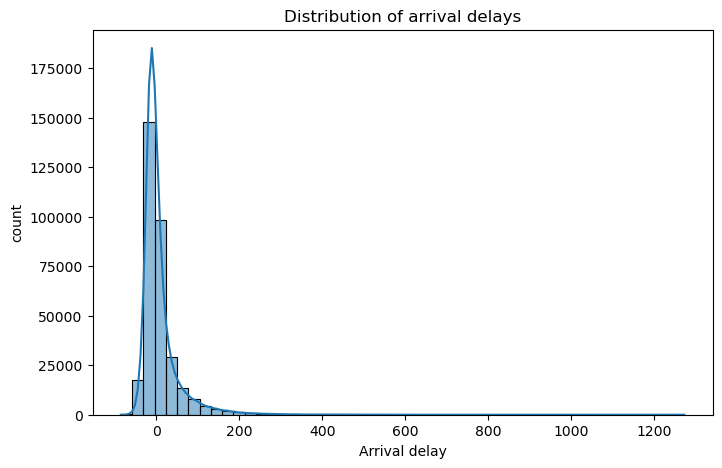

In [160]:
plt.figure(figsize=(8,5))
sns.histplot(data=d,x='arr_delay',bins=50,kde=True) #we used histplot here becuase distribution of a single numerical variable is suitable in showing histgram.count plot is used to count the freq of categorical variables
plt.title('Distribution of arrival delays')
plt.xlabel('Arrival delay')
plt.ylabel('count')
plt.show()


# Insights
Most flights have arrival delays clustered around zero, indicating many flights arrive close to their scheduled time.​

There is a high peak near zero on the x-axis, suggesting that the majority of flights either arrive on time or with very minor delays or early arrivals.​

The distribution is right-skewed: while most delays are short, there are some flights with much larger positive delays (very late arrivals), causing the long tail seen towards higher delay values (e.g., 200, 400, up to 1200 minutes).​

Negative delay values in the distribution confirm that early arrivals are present, but these are fewer compared to the peak around zero.

# Most frequent airlines

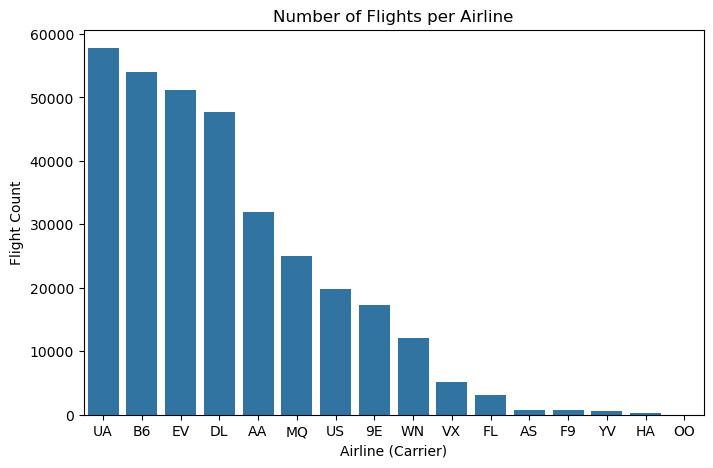

In [161]:
plt.figure(figsize=(8,5))
sns.countplot(x='carrier', data=d, order=d['carrier'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.xlabel('Airline (Carrier)')
plt.ylabel('Flight Count')
plt.show()


##  Insight
- UA airlines operates the most flights

###   flights distance distribution

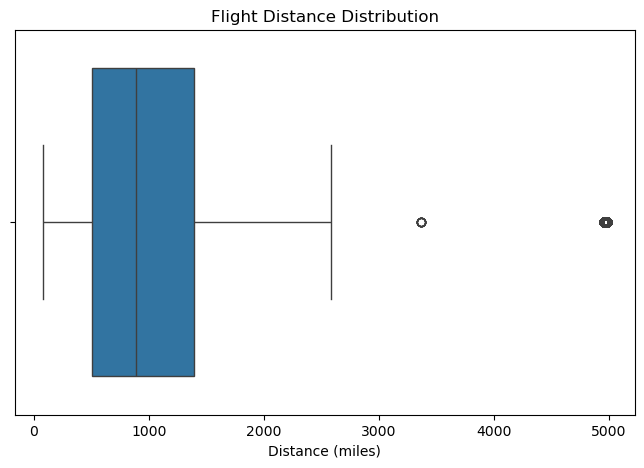

In [162]:
plt.figure(figsize=(8,5))
sns.boxplot(x=d['distance'])
plt.title('Flight Distance Distribution')
plt.xlabel('Distance (miles)')
plt.show()


# Share of flights by origin airport

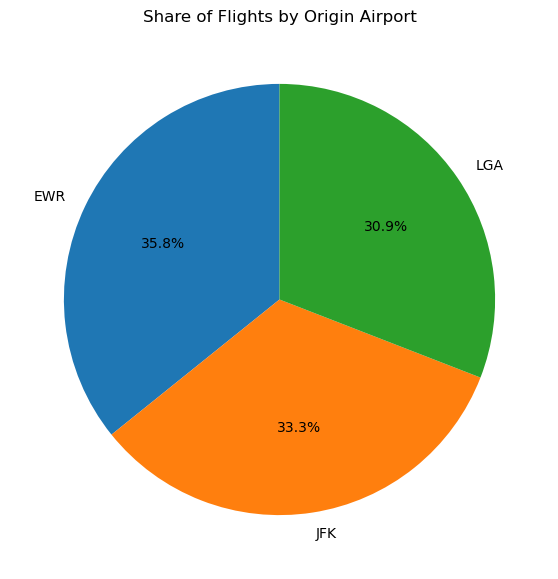

In [175]:
origin_counts = d['origin'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Flights by Origin Airport')
plt.show()


##  Insight:

Quickly shows which airport (like JFK/LGA/EWR) handles the most flights.

##  Bivariant Analysis

# Categorical-Numerical

# Origin vs Average Departure Delay

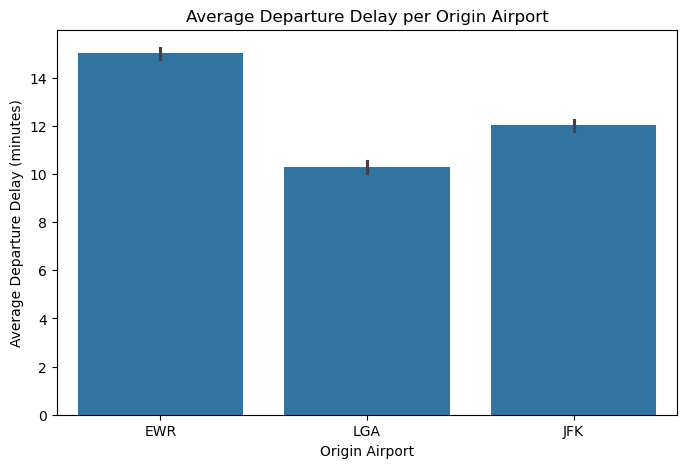

In [170]:
plt.figure(figsize=(8,5))
sns.barplot(data=d, x='origin', y='dep_delay', estimator='mean')
plt.title('Average Departure Delay per Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


##  Insight:

Reveals which airport is more delay-prone — important operational metric.

# Airline vs Average Arrival Delay

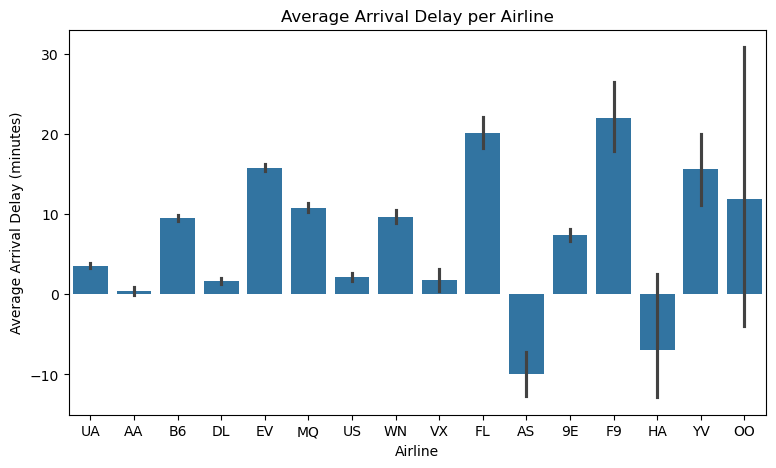

In [164]:
plt.figure(figsize=(9,5))
sns.barplot(data=d, x='carrier', y='arr_delay', estimator='mean')
plt.title('Average Arrival Delay per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()


## Insight
- Identifies which airlines are more punctual or prone to delays.

# Box Plot → (Distribution + Outliers)

# Departure Delay Distribution by Airline

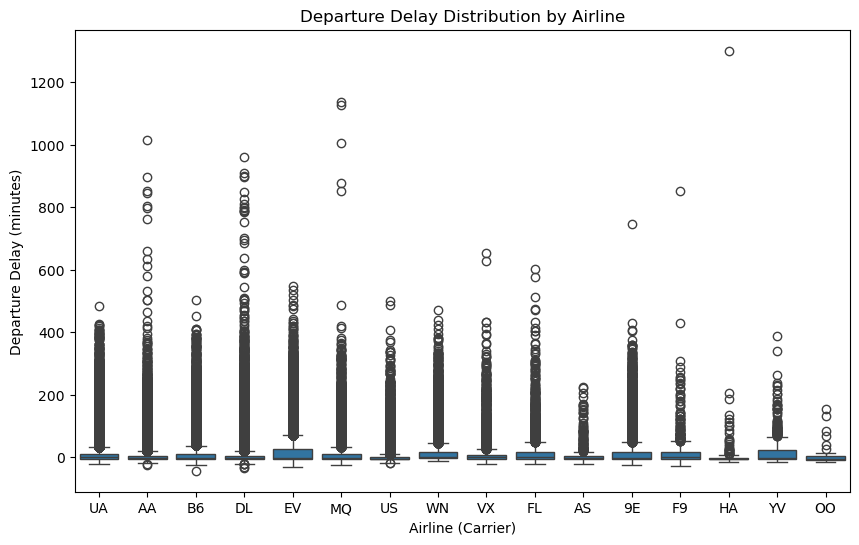

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(data=d, x='carrier', y='dep_delay')
plt.title('Departure Delay Distribution by Airline')
plt.xlabel('Airline (Carrier)')
plt.ylabel('Departure Delay (minutes)')
plt.show()


# Numerical-Numerical

# Hour of Day vs Average Departure Delay

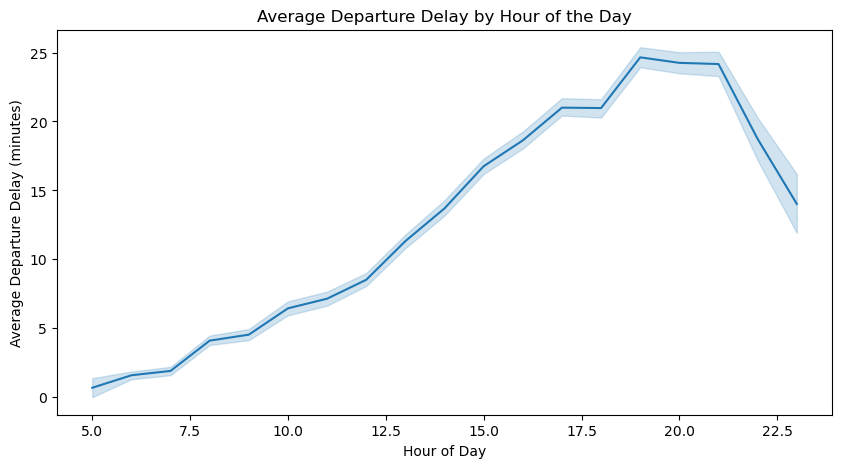

In [166]:
plt.figure(figsize=(10,5))
sns.lineplot(data=d, x='hour', y='dep_delay', estimator='mean')
plt.title('Average Departure Delay by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


# Insight:

Early morning flights are usually on time; delays increase toward evening.

# Distance vs Air Time

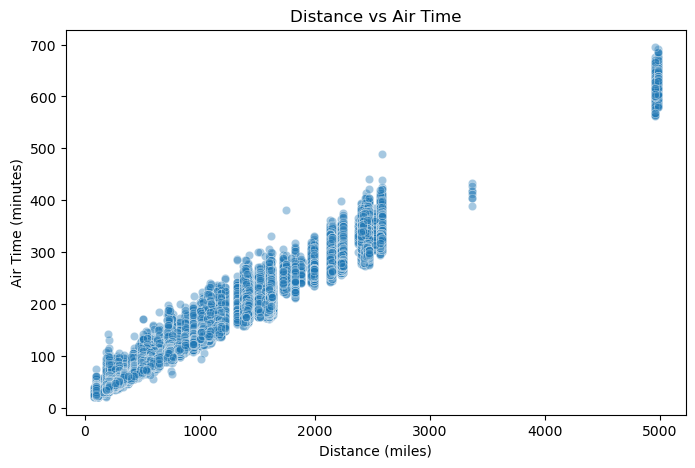

In [167]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=d, x='distance', y='air_time', alpha=0.4)
plt.title('Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.show()


##  Insight:

Strong linear relationship — longer flights take more time (used to verify data consistency).

# Departure Delay vs Arrival Delay

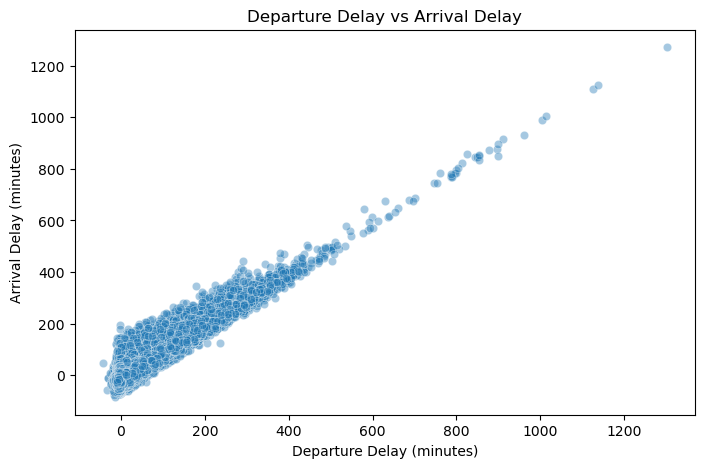

In [169]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=d, x='dep_delay', y='arr_delay', alpha=0.4)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


##  Insight:

Strong positive relationship — flights leaving late usually arrive late too.
Correlation should be close to +1.

# Categorical vs Categorical

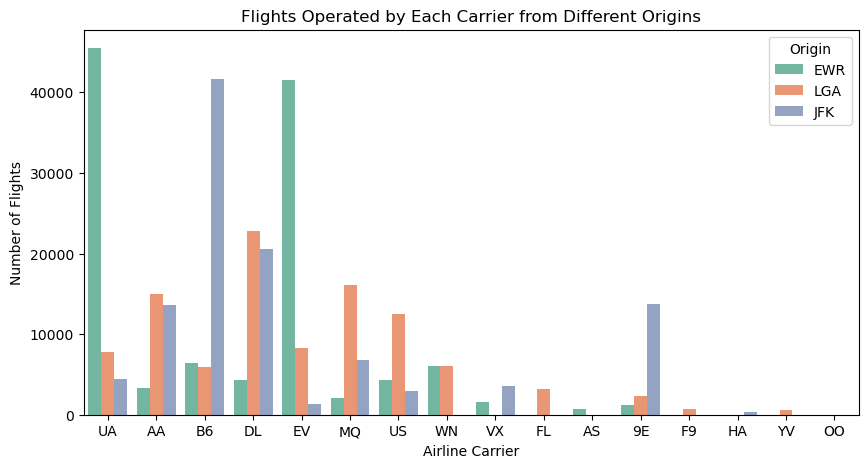

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=d, x='carrier', hue='origin', palette='Set2')
plt.title('Flights Operated by Each Carrier from Different Origins')
plt.xlabel('Airline Carrier')
plt.ylabel('Number of Flights')
plt.legend(title='Origin')
plt.show()


# Insights
Major carriers like UA, B6, and DL dominate specific origin airports, showing strong hub-based operations.

<Figure size 800x500 with 0 Axes>

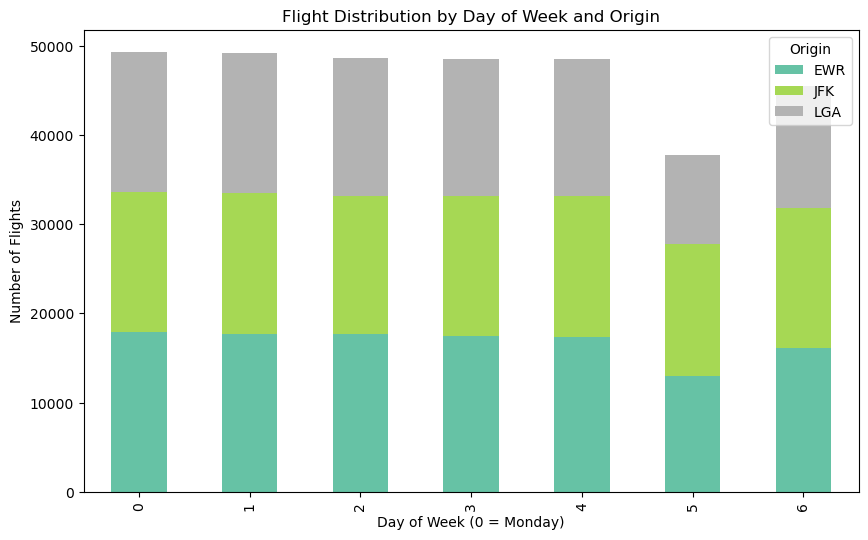

In [22]:
plt.figure(figsize=(8,5))
pd.crosstab(d['DayOfWeek'], d['origin']).plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Flight Distribution by Day of Week and Origin')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Number of Flights')
plt.legend(title='Origin')
plt.show()



# Insight:
Flight counts from all three origins are steady during weekdays but drop sharply on Saturday, showing lower weekend demand across EWR, JFK, and LGA.

# Multivariant Analysis

# Pair plot

# Relationship among Key Numeric Variables

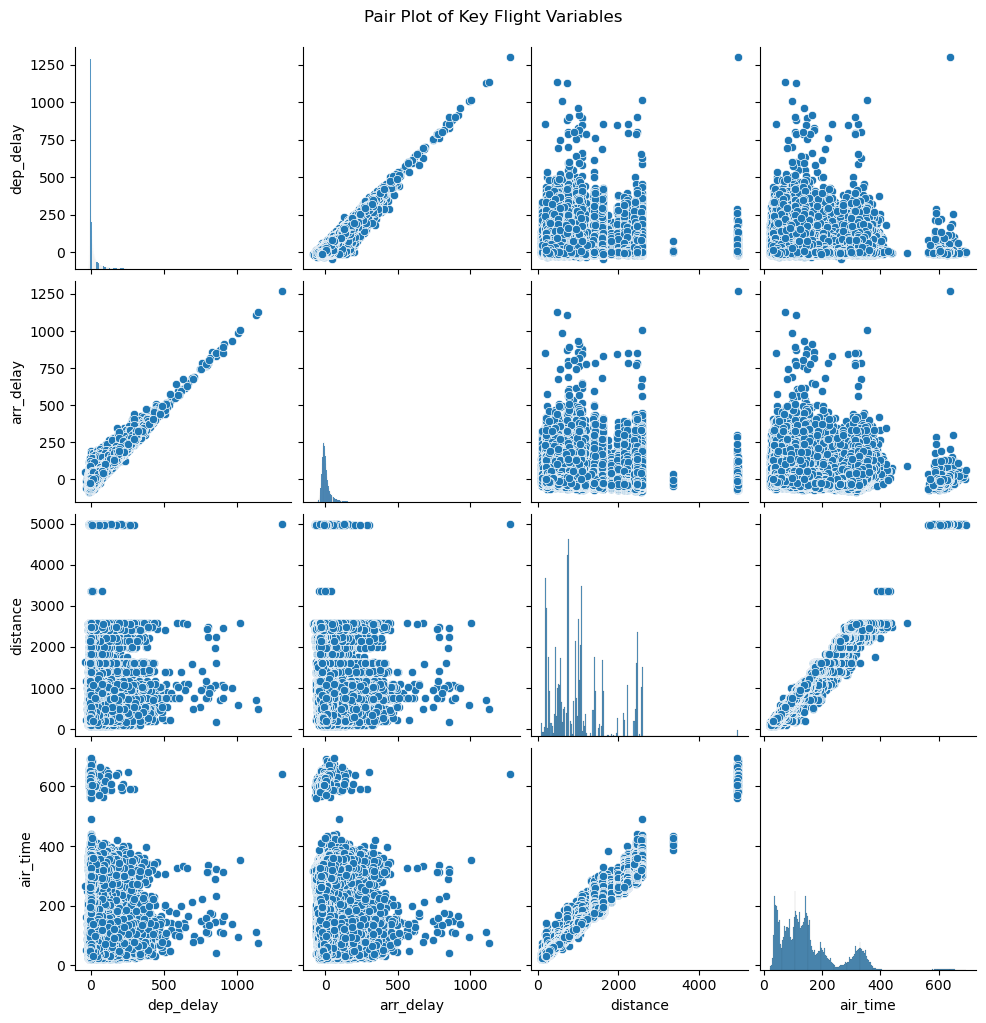

In [177]:
cols = ['dep_delay', 'arr_delay', 'distance', 'air_time']
sns.pairplot(d[cols])
plt.suptitle('Pair Plot of Key Flight Variables', y=1.02)
plt.show()


##  Insight:

Strong linear pattern between distance and air_time;
between dep_delay and arr_delay.

# Heat map

# Airline vs DayOfWeek

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


<Axes: xlabel='DayOfWeek', ylabel='carrier'>

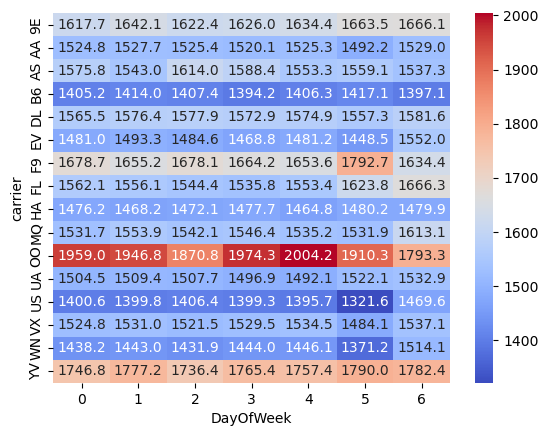

In [180]:
heat=pd.pivot_table(d,index='carrier',columns='DayOfWeek',values='arr_time',aggfunc='mean')
sns.heatmap(heat,annot=True,fmt=".1f",cmap='coolwarm')

# Handling Outliers

<Axes: >

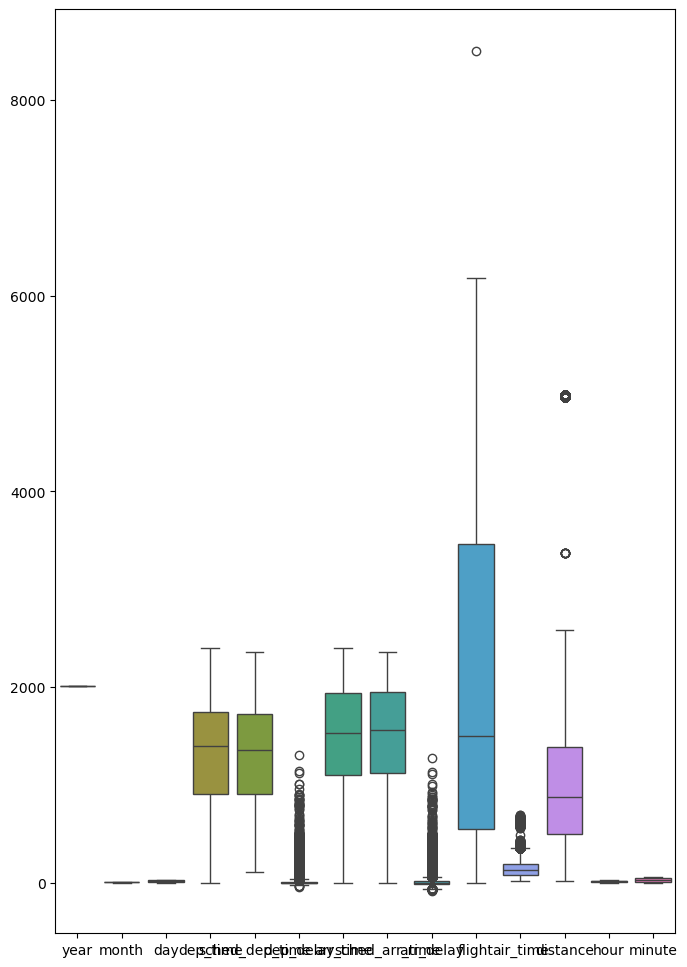

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,12))
sns.boxplot(d)

In [192]:
import matplotlib.pyplot as plt
num_cols=d.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    Q1=d[col].quantile(0.25)
    Q3=d[col].quantile(0.75)
    IQR=Q3-Q1
    low=Q1-1.5*IQR
    high=Q3+1.5*IQR
    print(f"the outliers of {col} : ")
    outliers=d[(d[col]<low) | (d[col]>high)]
    print(outliers[col])
    print()
    print()

the outliers of year : 
Series([], Name: year, dtype: int64)


the outliers of month : 
Series([], Name: month, dtype: int64)


the outliers of day : 
Series([], Name: day, dtype: int64)


the outliers of dep_time : 
Series([], Name: dep_time, dtype: float64)


the outliers of sched_dep_time : 
Series([], Name: sched_dep_time, dtype: int64)


the outliers of dep_delay : 
85         47.0
96         39.0
119       101.0
135        71.0
151       853.0
          ...  
336742     74.0
336757    194.0
336760     72.0
336762     80.0
336763    154.0
Name: dep_delay, Length: 42857, dtype: float64


the outliers of arr_time : 
Series([], Name: arr_time, dtype: float64)


the outliers of sched_arr_time : 
Series([], Name: sched_arr_time, dtype: int64)


the outliers of arr_delay : 
119       137.0
151       851.0
218       123.0
268       145.0
269        78.0
          ...  
336664    105.0
336668    174.0
336724    136.0
336757    194.0
336763    130.0
Name: arr_delay, Length: 27880, dtype: f

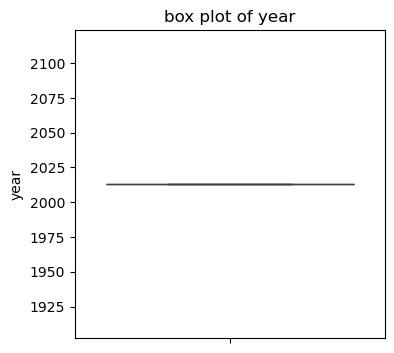

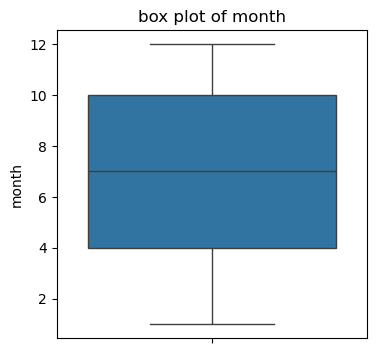

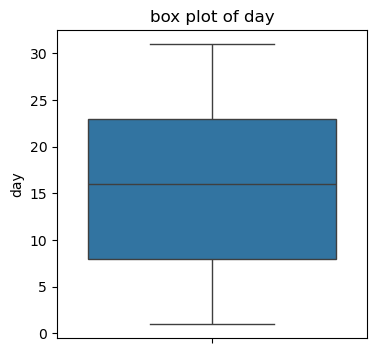

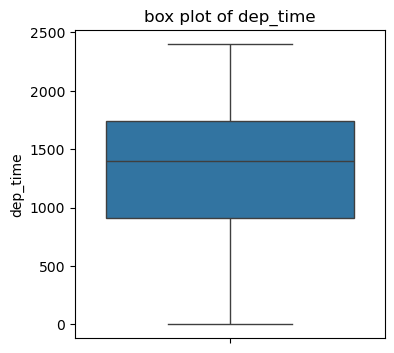

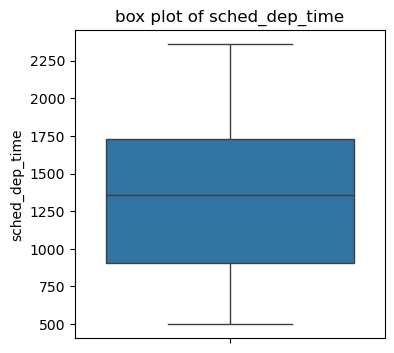

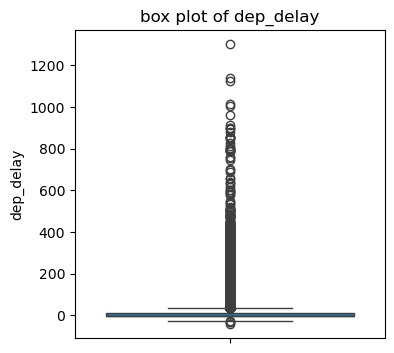

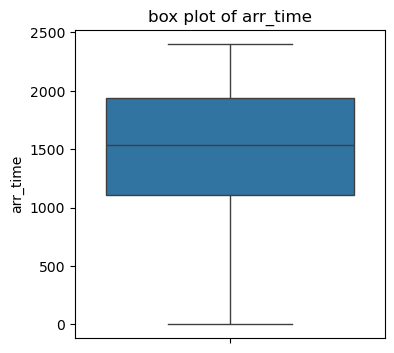

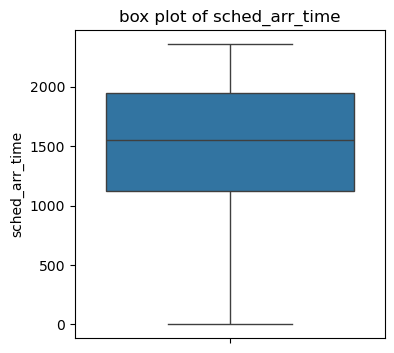

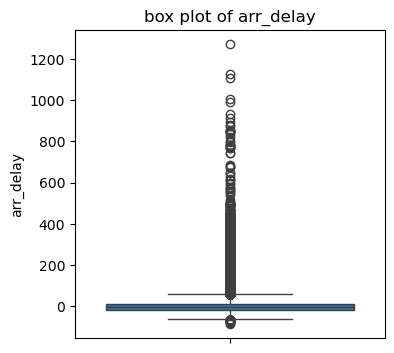

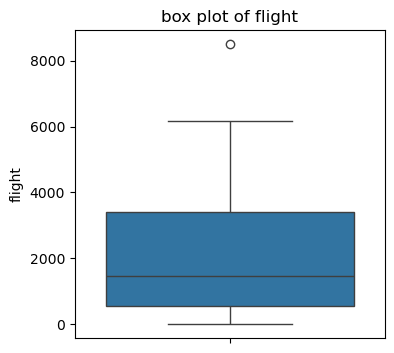

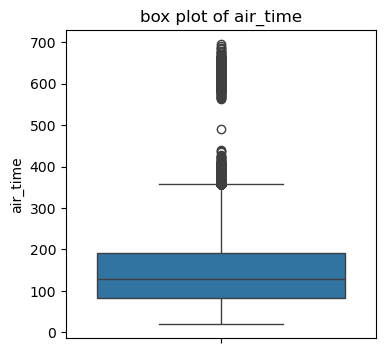

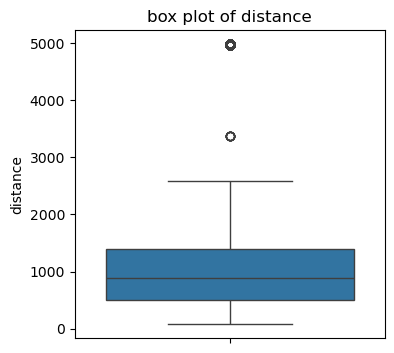

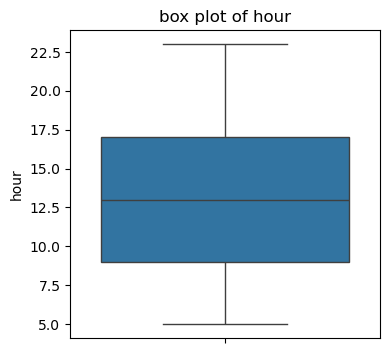

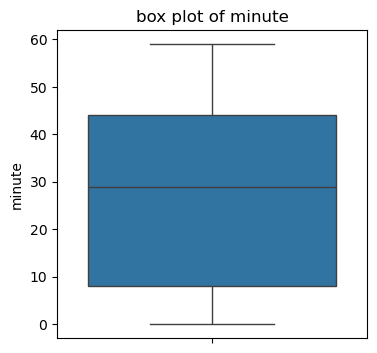

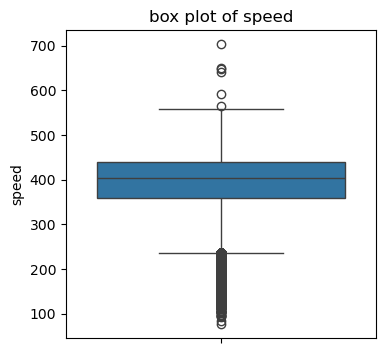

In [193]:
num_cols=d.select_dtypes(include=['float64','int64']).columns


for col in num_cols:
    plt.figure(figsize=(4,4))
    plt.title(f"box plot of {col}")
    sns.boxplot(d[col].dropna())
    plt.show()
    


In [194]:
num_cols=d.select_dtypes(include=['float64','int64']).columns #selects all numeric columns (float and integer types) from DataFrame d for outlier detection.

def outliers_exist(d,col):
    Q1=d[col].quantile(0.25)
    Q3=d[col].quantile(0.75)
    IQR=Q3-Q1
    low=Q1-1.5*IQR
    high=Q3+1.5*IQR
    return d[(d[col]<low) | (d[col]>high)].shape[0]>0

    
for col in num_cols:
    while outliers_exist(d,col):
        Q1=d[col].quantile(0.25)
        Q3=d[col].quantile(0.75)
        IQR=Q3-Q1
        low=Q1-1.5*IQR
        high=Q3+1.5*IQR
        median=d[col].median()
        d[col]=np.where((d[col]<low) | (d[col]>high),median,d[col])
for col in num_cols:
    print(f"the remaining outliers in {col}:{outliers_exist(d,col)}")

the remaining outliers in year:False
the remaining outliers in month:False
the remaining outliers in day:False
the remaining outliers in dep_time:False
the remaining outliers in sched_dep_time:False
the remaining outliers in dep_delay:False
the remaining outliers in arr_time:False
the remaining outliers in sched_arr_time:False
the remaining outliers in arr_delay:False
the remaining outliers in flight:False
the remaining outliers in air_time:False
the remaining outliers in distance:False
the remaining outliers in hour:False
the remaining outliers in minute:False
the remaining outliers in speed:False


<Axes: >

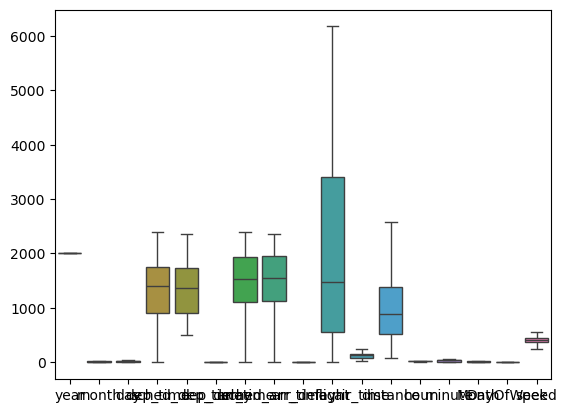

In [195]:
sns.boxplot(d)

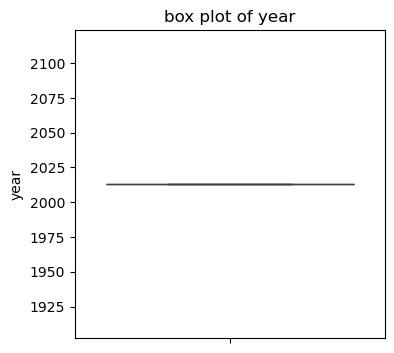

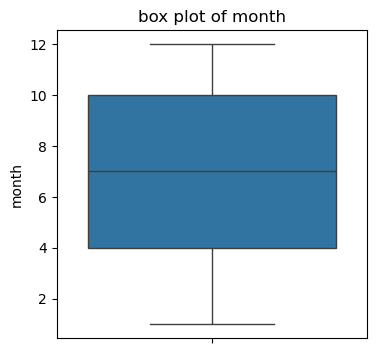

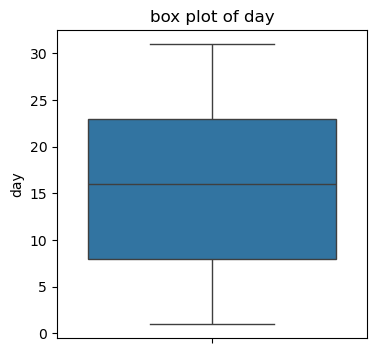

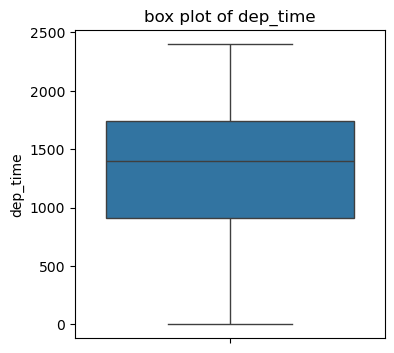

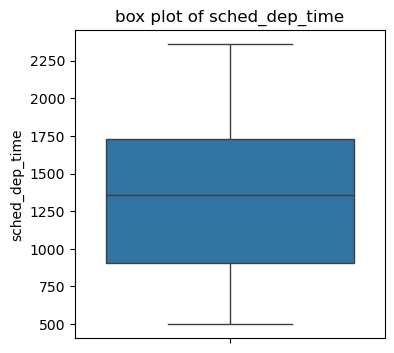

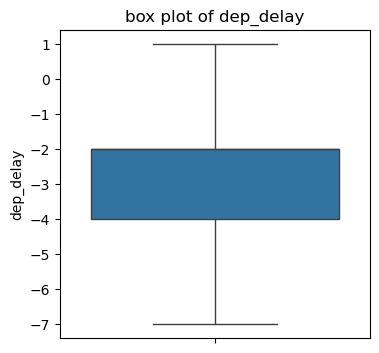

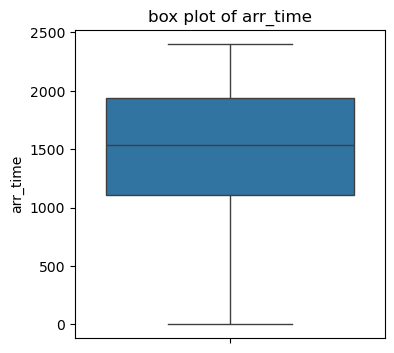

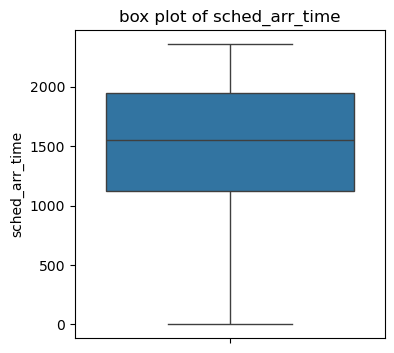

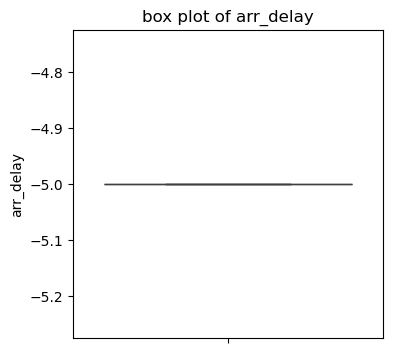

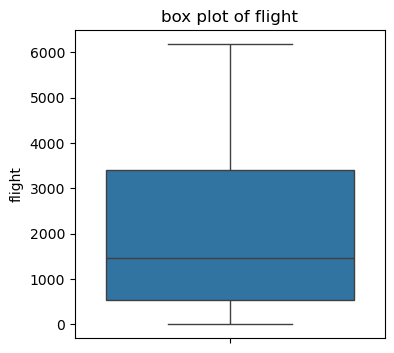

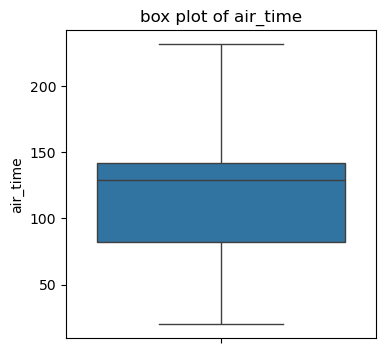

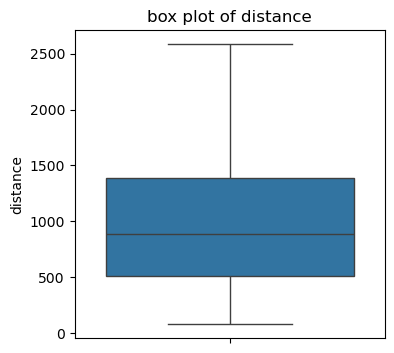

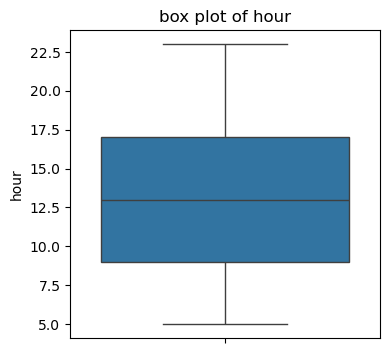

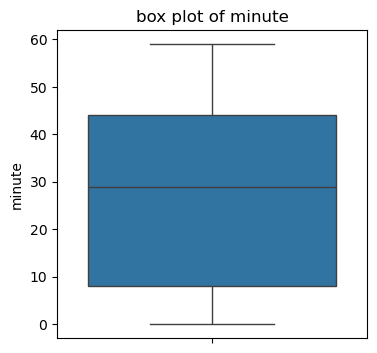

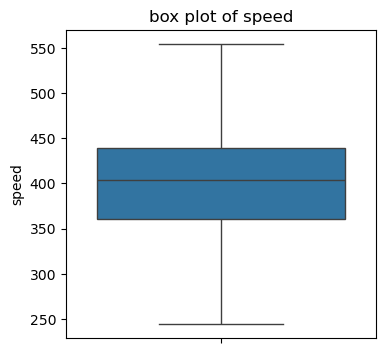

In [197]:
num_cols=d.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    plt.figure(figsize=(4,4))
    plt.title(f"box plot of {col}")
    sns.boxplot(d[col].dropna())
    plt.show()
    

# KEY INSIGHTS
- United Airlines (UA) operates the highest number of flights, primarily from EWR, showing it as the main operational hub.
- Evening flights tend to have higher delays compared to morning flights.
- Midweek days show consistent flight activity, while weekends drop slightly.
- Distance and air time are strongly correlated — longer flights take proportionally more time.
- Departure delays and arrival delays are closely linked — showing how small scheduling issues can ripple through the system.”


# Conclusion
To conclude, the flight dataset reflects real-world airline patterns —Certain months and days see heavier traffic, major hubs handle most flights, and delays are influenced more by airport congestion and timing rather than route distan